In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2

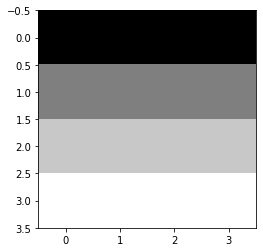

In [3]:
a = np.asarray([
    [0,0,0,0],
    [127,127,127,127],
    [200,200,200,200],
    [255,255,255,255],
], dtype='uint8')


plt.imshow(a, cmap='gray')

[[  5   5   5   5]
 [132 132 132 132]
 [205 205 205 205]
 [  4   4   4   4]]


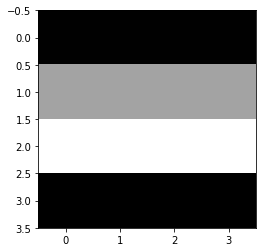

In [12]:
b = a + 5
plt.imshow(b, cmap='gray')
print(b)

(4, 4, 3)


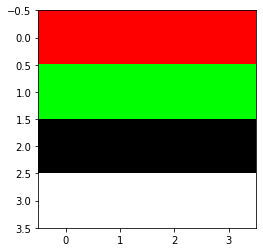

In [16]:
r = np.asarray([
    [255,255,255,255],
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255],
], dtype='uint8')

g = np.asarray([
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0],
    [255,255,255,255],
], dtype='uint8')

b = np.asarray([
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255],
], dtype='uint8')

colors = np.dstack([r,g,b])
print(colors.shape)
plt.imshow(colors)
plt.show()

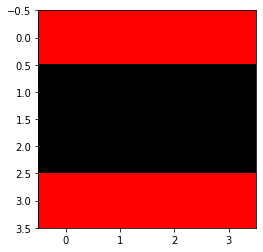

In [27]:
z = np.zeros((4,4), dtype='uint8')
rr = np.dstack([r,z,z])
gg = np.dstack([z,g,z])
bb = np.dstack([z,z,b])
plt.imshow(rr)
plt.show()


<class 'numpy.ndarray'>
(217, 232, 3)


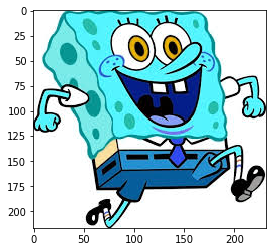

In [33]:
img = cv2.imread('nemo.jpg')
print(type(img))
print(img.shape)

plt.imshow(img)

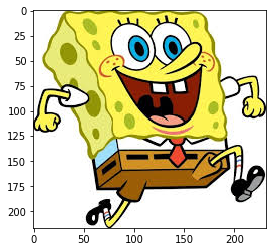

In [42]:
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

rgb = np.dstack([r,g,b])

plt.imshow(rgb)

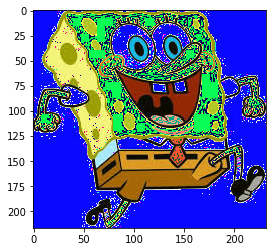

In [47]:
b = img[:, :, 0]
g = img[:, :, 1] + 10
r = img[:, :, 2] + 10

rgb = np.dstack([r,g,b])

plt.imshow(rgb)

True

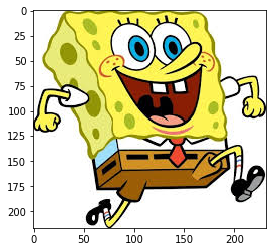

In [49]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
cv2.imwrite('result.jpg', img)

<img src='result.jpg'>

In [93]:
man = cv2.imread('man.jpg')
hsv = cv2.cvtColor(man, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]
skin = man.copy()
mask = np.zeros(man.shape, dtype='uint8')

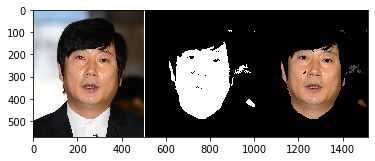

In [94]:
for r in range(man.shape[0]):
    for c in range(man.shape[1]):
        hrange = h[r,c] >= 0 and h[r,c] <= 20
        srange = s[r,c] >= 48 and s[r,c] <= 255
        vrange = v[r,c] >= 80 and v[r,c] <= 255
        if hrange and srange and vrange:
            mask[r,c, :] = 255
            skin[r,c,0] = man[r,c,0]
            skin[r,c,1] = man[r,c,1]
            skin[r,c,2] = man[r,c,2]
        else:
            skin[r,c,0] = 0
            skin[r,c,1] = 0
            skin[r,c,2] = 0
result = np.hstack([
    man,
    mask,
    skin
])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

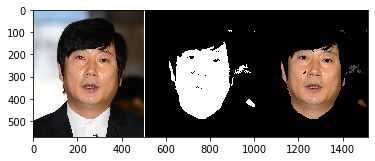

In [86]:
man = cv2.imread('man.jpg')
hsv = cv2.cvtColor(man, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

bH = (h>=0) & (h<=20)
bS = (s>=48) & (s<=255)
bV = (v>=80) & (v<=255)
mask = bH & bS & bV

bin_img = np.zeros(man.shape, dtype='uint8')
bin_img[mask] = (255,255,255)

skin_img = man.copy()
skin_img[~mask] = 0

result = np.hstack([
    man,
    bin_img,
    skin_img
])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

(391, 358, 3)


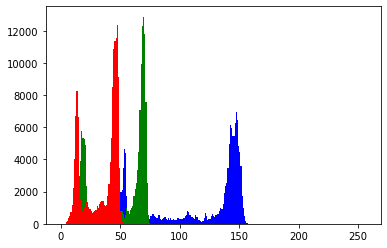

In [132]:
train = cv2.imread('patch2.png')
print(train.shape)

b,g,r = cv2.split(train)

plt.hist(b.ravel(), 256, [0,256], color='b');
plt.hist(g.ravel(), 256, [0,256], color='g');
plt.hist(r.ravel(), 256, [0,256], color='r');

(391, 358, 3)
105 129
120 242
17 157


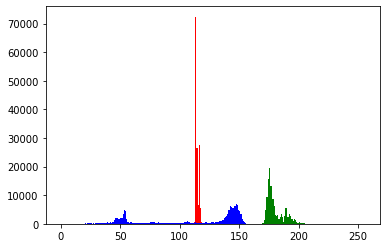

In [119]:
train = cv2.imread('patch2.png')
print(train.shape)

h,s,v = cv2.split(cv2.cvtColor(train, cv2.COLOR_BGR2HSV))

plt.hist(h.ravel(), 256, [0,256], color='r');
plt.hist(s.ravel(), 256, [0,256], color='g');
plt.hist(v.ravel(), 256, [0,256], color='b');
print(h.min(), h.max())
print(s.min(), s.max())
print(v.min(), v.max())

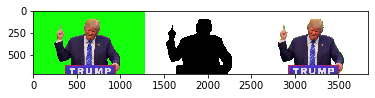

In [156]:
def val_max_cnt(arr):
    values, cnts = np.unique(arr, return_counts=True)
    return values[cnts.argmax()]

def in_range(arr, std, dst):
    is_gte = arr >= std-dst
    is_lte = arr <= std+dst
    return is_gte & is_lte

croma_img = cv2.imread('trump.jpg')
h,s,v = cv2.split(cv2.cvtColor(croma_img, cv2.COLOR_BGR2HSV))

dst = 40
bH = in_range(h, val_max_cnt(h), dst)
bS = in_range(s, val_max_cnt(s), dst)
bV = in_range(v, val_max_cnt(v), dst)
mask = bH & bS & bV

bin_img = np.zeros(croma_img.shape, dtype='uint8')
bin_img[mask] = (255,255,255)

obj_img = croma_img.copy()
obj_img[mask] = 255

result = np.hstack([
    croma_img,
    bin_img,
    obj_img
])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))